In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


  Using cached https://files.pythonhosted.org/packages/e3/18/4f013c3c3051f4e0ffbaa4bf247050d6d5e527fe9cb1907f5975b172f23f/numpy-1.16.2-cp35-cp35m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.11.1
    Not uninstalling numpy at /bham/pd/packages/python/3.5/lib/python3.5/site-packages, outside environment /bham/pd/packages/tensorflow/1.1.0
  Can't rollback numpy, nothing uninstalled.
Exception:
Traceback (most recent call last):
  File "/bham/pd/packages/python/3.5/lib/python3.5/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/bham/pd/packages/python/3.5/lib/python3.5/site-packages/pip/commands/install.py", line 317, in run
    prefix=options.prefix_path,
  File "/bham/pd/packages/python/3.5/lib/python3.5/site-packages/pip/req/req_set.py", line 742, in install
    **kwargs
  File "/bham/pd/packages/python/3.5/lib/python3.5/site-packages/pip/req/req_install.py", line 831, in install
    self.move_wheel_files(self.source_dir,

ImportError: No module named 'pandas'

In [ ]:
#References
#https://charlesreid1.github.io/circe/Abalone%20-%20Principal%20Component%20Analysis.html
#https://github.com/kmiksa/Abalone/blob/master/Abalone.ipynb

In [2]:
df = pd.read_csv("Dataset.data",sep=' ',names=['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'])
df.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
na_col = df.isnull().any()
print(na_col)

sex               False
length            False
diameter          False
height            False
whole_weight      False
shucked_weight    False
viscera_weight    False
shell_weight      False
rings             False
dtype: bool


In [4]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df['sex']=[1 if i=='M' else 2 if i=='F' else 3 for i in df.sex]
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,2,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [6]:
df['volume']=df['length']*df['diameter']*df['height']
df_new = df.drop(columns=['length','diameter','height'])
df_new

,sex,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,volume
0,1,0.5140,0.2245,0.1010,0.1500,15,0.015777
1,1,0.2255,0.0995,0.0485,0.0700,7,0.008347
2,2,0.6770,0.2565,0.1415,0.2100,9,0.030051
3,1,0.5160,0.2155,0.1140,0.1550,10,0.020075
4,3,0.2050,0.0895,0.0395,0.0550,7,0.006732
5,3,0.3515,0.1410,0.0775,0.1200,8,0.012113
6,2,0.7775,0.2370,0.1415,0.3300,20,0.032993
7,2,0.7680,0.2940,0.1495,0.2600,16,0.028953
8,1,0.5095,0.2165,0.1125,0.1650,9,0.021969
9,2,0.8945,0.3145,0.1510,0.3200,19,0.036300


In [7]:
means = []
for i in df_new.iloc[:,1:]:
    means.append(df_new[i].mean())
    df_new[i] = df_new[i]-df_new[i].mean()
print(means)
df_new

[0.8287421594445774, 0.35936748862820206, 0.18059360785252573, 0.23883085946851804, 9.933684462532918, 0.03471513697031362]


,sex,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,volume
0,1,-0.314742,-0.134867,-0.079594,-0.088831,5.066316,-0.018938
1,1,-0.603242,-0.259867,-0.132094,-0.168831,-2.933684,-0.026368
2,2,-0.151742,-0.102867,-0.039094,-0.028831,-0.933684,-0.004664
3,1,-0.312742,-0.143867,-0.066594,-0.083831,0.066316,-0.014640
4,3,-0.623742,-0.269867,-0.141094,-0.183831,-2.933684,-0.027983
5,3,-0.477242,-0.218367,-0.103094,-0.118831,-1.933684,-0.022603
6,2,-0.051242,-0.122367,-0.039094,0.091169,10.066316,-0.001723
7,2,-0.060742,-0.065367,-0.031094,0.021169,6.066316,-0.005762
8,1,-0.319242,-0.142867,-0.068094,-0.073831,-0.933684,-0.012746
9,2,0.065758,-0.044867,-0.029594,0.081169,9.066316,0.001585


In [8]:
X = df_new.iloc[:,1:].values
covariance = X.T.dot(X)/4176
print(covariance)

[[2.40481389e-01 1.05518032e-01 5.19461632e-02 6.52158684e-02
  8.54408544e-01 9.95701836e-03]
 [1.05518032e-01 4.92675507e-02 2.26749006e-02 2.72709563e-02
  3.01203734e-01 4.33360555e-03]
 [5.19461632e-02 2.26749006e-02 1.20152839e-02 1.38495613e-02
  1.78057215e-01 2.16516846e-03]
 [6.52158684e-02 2.72709563e-02 1.38495613e-02 1.93773832e-02
  2.81663350e-01 2.76306784e-03]
 [8.54408544e-01 3.01203734e-01 1.78057215e-01 2.81663350e-01
  1.03952659e+01 3.71665325e-02]
 [9.95701836e-03 4.33360555e-03 2.16516846e-03 2.76306784e-03
  3.71665325e-02 4.47457432e-04]]


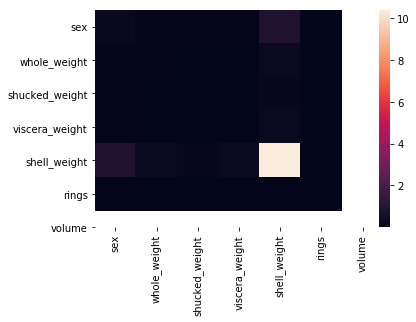

In [11]:
sns.heatmap(covariance,xticklabels = df_new.columns,yticklabels = df_new.columns)